In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from collections import namedtuple

import seaborn as sns

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [50]:
### General Processing

In [51]:
main = pd.read_excel('movantanalysis.xlsx', sheet_name = 'KM Data Edits')
datapull = pd.read_excel('movantanalysis.xlsx', sheet_name = 'Data Pull Sheet')
aums = pd.read_excel('movantanalysis.xlsx', sheet_name = 'All Institution AUMs')
removed = pd.read_excel('movantanalysis.xlsx', sheet_name = 'Removed cases')

In [52]:
movant_categories = main["Movant ID"].str.split(".", n=2, expand = True)
main['Movant Group'] = movant_categories[0]+movant_categories[1]

In [53]:
main = main.merge(aums[['Institutional Movant', 'AUM']], how = 'left', left_on = 'Movant', right_on = 'Institutional Movant')

In [54]:
main = main.merge(datapull[['Ticker','Damage Bucket', "Filing Firm", "Lead Plaintiff"]], how = 'left', on = 'Ticker')

In [55]:
main = main.loc[:2866,:]

In [56]:
main["Type (Ind, Ins, G-Ind, G-Ins, G-Mix)"] = main["Type (Ind, Ins, G-Ind, G-Ins, G-Mix)"].str.replace("InS", "Ins")
main["Type (Ind, Ins, G-Ind, G-Ins, G-Mix)"] = main["Type (Ind, Ins, G-Ind, G-Ins, G-Mix)"].str.replace("ins", "Ins")
main["Type (Ind, Ins, G-Ind, G-Ins, G-Mix)"] = main["Type (Ind, Ins, G-Ind, G-Ins, G-Mix)"].str.replace("G-mix", "G-Mix")
main["Type (Ind, Ins, G-Ind, G-Ins, G-Mix)"] = main["Type (Ind, Ins, G-Ind, G-Ins, G-Mix)"].str.replace("ind", "Ind")
main["Type (Ind, Ins, G-Ind, G-Ins, G-Mix)"] = main["Type (Ind, Ins, G-Ind, G-Ins, G-Mix)"].str.replace("g-Ind", "G-Ind")

In [57]:
main["Small Case"] = 0
main.loc[main["Damage Bucket"].isin(["A","B"]), "Small Case"] = 1 
main.loc[main["Lead Plaintiff"].isna(),"Lead Plaintiff"] = "None"

In [58]:
def win(a, b):
    if a in b: return 1
    else: return 0

main = main.assign(win = main.apply(lambda row: win(row["Movant"], row["Lead Plaintiff"]), axis =1))

In [60]:
main["unopposed"] = 0
main.loc[main["Contested/\nUncontested"]=="Uncontested", "unopposed"] = 1

### I. MOVANT ANALYSIS BY REPORTED DAMAGES BY BUCKET

#### I. A. Number of Cases by Bucket

In [62]:
data_1a = datapull['Damage Bucket'].value_counts()

In [63]:
y_val = data_1a.sort_index()
x_val = data_1a.sort_index().index

<Figure size 432x288 with 0 Axes>

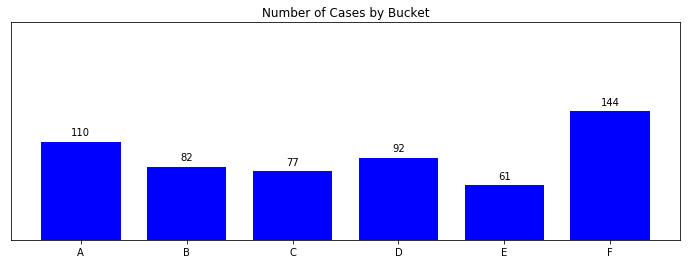

In [64]:
plt.clf()
fig, ax = plt.subplots(figsize=(12,4))
width = 0.75
ind = np.arange(len((y_val)))
plt.title('Number of Cases by Bucket')
plt.yticks([], [])
ax.bar(x_val, y_val, width, color = "blue")

ax.set_ylim([0,y_val.max()+ 100])

rects = ax.patches

ax.yaxis.set_ticks_position('none')

for rect, label in zip(rects, y_val):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')
plt.show()

#### I.B. Analysis by Bucket

In [20]:
data_1b = datapull[['Damage Bucket', 'Docket Number','Total Damages','% of Total Damages']].

In [44]:
data_1b_total = data_1b[['Damage Bucket', 'Docket Number','Total Damages']].dropna()
data_1b_describe_total = data_1b_total.pivot(index = 'Docket Number', columns = 'Damage Bucket', values = 'Total Damages')
data_1b_describe_total_ranked = pd.DataFrame(np.sort(data_1b_total.pivot(index = 'Docket Number', columns = 'Damage Bucket', values = 'Total Damages').fillna(0), axis = 0)[-2:,:], columns = data_1a.sort_index().index, index = ['Largest', '2nd Largest'])

In [45]:
data_1b_bps = data_1b[['Damage Bucket', 'Docket Number','% of Total Damages']]
data_1b_describe_bps = data_1b_bps.pivot(index = 'Docket Number', columns = 'Damage Bucket', values = '% of Total Damages')

In [48]:
x_val = np.sort(data_1b_total['Damage Bucket'].unique())

ValueError: List of boxplot statistics and `positions` values must have same the length

<Figure size 432x288 with 0 Axes>

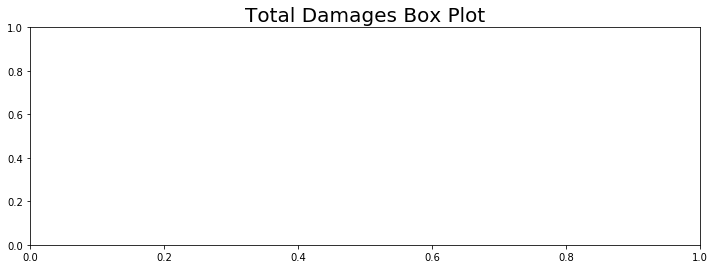

In [49]:
plt.clf()
plt.figure(figsize=(12,4))
plt.title("Total Damages Box Plot", size = 20)
ax = sns.boxplot(y = 'Total Damages', x = 'Damage Bucket', data = data_1b_total[~data_1b_total["Damage Bucket"].isin(["F"])], order = x_val[:5], showfliers=False)
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda y, p: format(int(y), ',')))
plt.show()

In [ ]:
plt.clf()
plt.figure(figsize=(12,4))
plt.title("Total Damages Box Plot", size = 20)
ax = sns.boxplot(y = 'Total Damages', x = 'Damage Bucket', data = data_1b_total[data_1b_total["Damage Bucket"].isin(["F"])], order = x_val[5:6], showfliers=False)
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda y, p: format(int(y), ',')))
plt.show()

In [ ]:
print("Two Largest Damages")

In [ ]:
pd.options.display.float_format = '{:.0f}'.format
pd.DataFrame(np.sort(data_1b_total.pivot(index = 'Docket Number', columns = 'Damage Bucket', values = 'Total Damages').fillna(0), axis = 0)[-2:,:], columns = data_1a.sort_index().index, index = ['Largest', '2nd Largest'])

In [ ]:
pd.options.display.float_format = '{:.0f}'.format
print("By Total Damage")
data_1b_describe_total.describe()

In [ ]:
pd.options.display.float_format = '{:,.2%}'.format
print("By BPS")
data_1b_describe_bps.describe

#### I.C. Win-Loss Analysis

In [ ]:
print("TBD")

### II. ANALYSIS BY TYPE OF MOVANT

#### II. A. Number of Movants by Bucket

In [ ]:
data_2a = main["Damage Bucket"].value_counts()

In [ ]:
y_val = data_2a.sort_index()
x_val = data_2a.sort_index().index

In [ ]:
plt.clf()
fig, ax = plt.subplots(figsize=(12,4))
width = 0.75
ind = np.arange(len((y_val)))
plt.title('Number of Movants by Bucket')
plt.yticks([], [])
ax.bar(x_val, y_val, width, color = "blue")

rects = ax.patches

ax.yaxis.set_ticks_position('none')

for rect, label in zip(rects, y_val):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')
plt.show()

#### II.B. Number of Movants by Case

In [ ]:
data_2b = main.groupby("Ticker")["Movant ID"].count().reset_index()
data_2b_describe = data_2b.describe()

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
data_2b_describe

#### II.C. Movant By Type By Bucket

In [ ]:
data_2c = main[["Damage Bucket", "Type (Ind, Ins, G-Ind, G-Ins, G-Mix)", "Movant ID"]]

In [ ]:
data_2c_grouped = data_2c.groupby(["Damage Bucket", "Type (Ind, Ins, G-Ind, G-Ins, G-Mix)"])["Movant ID"].count().reset_index()

In [ ]:
data_2c_grouped

#### II.D. For Groups

In [ ]:
data_2d = main[["Movant Group", "Type (Ind, Ins, G-Ind, G-Ins, G-Mix)", "Movant Loss", "# of Movant Groups"]]
data_2d_groupcount = data_2d.groupby("Type (Ind, Ins, G-Ind, G-Ins, G-Mix)")["# of Movant Groups"].mean()
data_2d_groupcount = data_2d_groupcount.append(pd.Series(main["# of Movant Groups"].mean(), index = ["Total"]))
data_2d_loss = data_2d.groupby("Type (Ind, Ins, G-Ind, G-Ins, G-Mix)")["Movant Loss"].mean()
data_2d_loss = data_2d_loss.append(pd.Series(main["Movant Loss"].mean(), index = ["Total"]))

In [ ]:
data_2d = pd.concat([data_2d_groupcount, data_2d_loss], axis = 1)
data_2d.columns = ["Avg # of Groups", "Avg Losses"]

In [ ]:
data_2d

#### II.D. For Unopposed Lead Plaintiff Motions

In [ ]:
print("TBD")

#### II.E. Gun to Knife Fight Analysis

In [ ]:
data_2e = main[["Small Case", "Type", "Ticker"]]

In [ ]:
data_2e_institution_involved = data_2e[data_2e["Type"]=="Institution"]["Ticker"]

In [ ]:
data_2e = data_2e.assign(Inst_Involved = 0)
data_2e.loc[data_2e["Ticker"].isin(data_2e_institution_involved), "Inst_Involved"] = 1

In [ ]:
data2e_counts = data_2e.groupby(["Small Case", "Inst_Involved"])["Ticker"].count().reset_index()

In [ ]:
data2e_counts

In [ ]:
print("Win Analysis: TBD")

### III. ANALYSIS BY INSTITUTIONAL MOVEMENT TYPE

#### III. A. Institutional Movants by Bucket

In [ ]:
data_3 = main[main["Type"]== "Institution"]

In [ ]:
data_3a = data_3.groupby('Damage Bucket')['Institutional Movant'].count()

In [ ]:
y_val = data_3a.sort_index()
x_val = data_3a.sort_index().index

In [ ]:
plt.clf()
fig, ax = plt.subplots(figsize=(12,4))
width = 0.75
ind = np.arange(len((y_val)))
plt.title('Number of Institutional Movants by Bucket')
plt.yticks([], [])
ax.bar(x_val, y_val, width, color = "blue")

rects = ax.patches

ax.yaxis.set_ticks_position('none')

for rect, label in zip(rects, y_val):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')
plt.show()

#### III.B Average Loss By Institutional Movant by Bucket
#### Note: Does not include institutional movants without losses (N/A)

In [ ]:
data_3b = data_3[['Damage Bucket',  "Type", 'Movant Loss']].dropna()
data_3b_describe = data_3b.pivot(columns = 'Damage Bucket', values = 'Movant Loss')
data_3b_describe = data_3b_describe.describe()

In [ ]:
pd.options.display.float_format = '{:.0f}'.format
data_3b_describe

#### III.C. Average Loss By Winning Institutional Movant by Bucket
#### Note: Does not include institutional movants without losses (N/A)

In [ ]:
print("TBD")

#### III.D. Average AUM of Institutional Movant by Bucket
##### Note: Count Includes Only Institutional Movants with AUMs (no N/As)

In [ ]:
data_3d = main[['Damage Bucket',  "Institutional Movant", "AUM"]].dropna()
data_3d_describe = data_3d.pivot(columns = 'Damage Bucket', values = 'AUM')
data_3d_describe = data_3d_describe.describe()

In [ ]:
pd.options.display.float_format = '{:.0f}'.format
data_3d_describe

#### III.E. Frequent Flyer Analysis

#### III.E.1. Movant Type

In [ ]:
data_3e = main[["Institutional Movant", "Damage Bucket", "Type (Ind, Ins, G-Ind, G-Ins, G-Mix)", 'Investor Frequent Flyer', 'Movant Loss', "Filing Firm"]]
data_3e = data_3e[~data_3e["Institutional Movant"].isna()]
data_3e.loc[(data_3e["Investor Frequent Flyer"].isna()),"Investor Frequent Flyer"] = "NotFF"

In [ ]:
data_3e1 = data_3e.groupby(["Type (Ind, Ins, G-Ind, G-Ins, G-Mix)", "Investor Frequent Flyer"])["Institutional Movant"].count().reset_index().sort_values("Type (Ind, Ins, G-Ind, G-Ins, G-Mix)")

In [ ]:
y_val1 = data_3e1[data_3e1["Investor Frequent Flyer"]== "FF"]["Institutional Movant"]
y_val2 = data_3e1[data_3e1["Investor Frequent Flyer"]== "NotFF"]["Institutional Movant"]
x_val = data_3e1[data_3e1["Investor Frequent Flyer"]== "FF"]["Type (Ind, Ins, G-Ind, G-Ins, G-Mix)"]

In [ ]:
data_3e1

#### By Bucket

In [ ]:
data_3e2 = data_3e.groupby(["Damage Bucket", "Investor Frequent Flyer"])["Institutional Movant"].count().reset_index().sort_values("Damage Bucket")

In [ ]:
data_3e2

#### By Filing Firm

In [ ]:
data_3e["Filing Firm"] = data_3e["Filing Firm"].astype(str)

In [ ]:
data_3e3 = data_3e.groupby(["Filing Firm", "Investor Frequent Flyer"])["Institutional Movant"].count().reset_index().sort_values("Filing Firm")

In [ ]:
data_3e3

### APPENDIX

plt.clf()
plt.bar(x_val, y_val, color="b")
plt.title('Number of Cases by Bucket')
plt.show()

plt.clf()
fig, ax = plt.subplots(figsize=(12,4))
width = 0.75
ind = np.arange(len((y_val)))
ticks = np.array([2,4,6,8,10])

plt.title('Number of Institutional Movants by Bucket')

ax.bar(ticks, y_val1, width, color = "blue")
ax.bar(ticks + np.repeat(width, len(x_val)), y_val2, width, color = "orange")

plt.yticks([], [])

ax.set_ylim([0,y_val2.max()+ 100])

rects = ax.patches
ax.yaxis.set_ticks_position('none')

for i in range(len(x_val)):
    height = rects[i].get_height()
    ax.text(rects[i].get_x() + rects[i].get_width() / 2, height + 5, y_val1[i],
            ha='center', va='bottom')
    ax.text(rects[i].get_x() + rects[i].get_width() / 2, height + 5, y_val2[i],
            ha='center', va='bottom')
    
plt.xticks(ticks, c_val)

plt.show()

#### Number of Cases by Bucket

y_val = datapull['Damage Bucket'].value_counts().sort_index()
x_val = datapull['Damage Bucket'].value_counts().sort_index().index

plt.clf()
plt.bar(x_val, y_val, color="b")
plt.show()

bucketmovantcount = main['Damage Bucket'].value_counts().sort_index()

bucketmovantcount

fig, ax = plt.subplots() 

ind = np.arange(len(y_val))
bar_width = 0.75

ax.bar(ind, y_val, bar_width, col = 'b')
for i, v in enumerate(y):
    ax.text(v + 3, i + .25, str(v), color='blue')

plt.title('Number of Classes by Bucket', size = 16)

fig.tight_layout()

plt.show()

buckets = main["Damage Bucket"].sort_values().dropna().unique()
types = main["Type (Ind, Ins, G-Ind, G-Ins, G-Mix)"].sort_values().dropna().unique()

xval = buckets
yval = []

for i in buckets: 
    yval.append(data_2c_grouped[i][types])

plt.clf()
fig, ax = plt.subplots(figsize=(12,4))
width = 0.75
ind = np.arange(len((y_val)))
ticks = np.array([2,4,6,8,10])

plt.title('Number of Movants by Type for Each Bucket')

for i in yval
ax.bar(ticks, y_val1, width, color = "blue")
ax.bar(ticks + np.repeat(width, len(x_val)), y_val2, width, color = "orange")

plt.yticks([], [])

ax.set_ylim([0,y_val2.max()+ 100])

rects = ax.patches
ax.yaxis.set_ticks_position('none')

for i in range(len(x_val)):
    height = rects[i].get_height()
    ax.text(rects[i].get_x() + rects[i].get_width() / 10 + , height + 5, y_val1[i],
            ha='center', va='bottom')
    ax.text(rects[i].get_x() + rects[i].get_width() / i*2, height + 5, y_val2[i],
            ha='center', va='bottom')
    
plt.xticks(ticks, c_val)

plt.show()